# Movie review - Sentimental analysis

#importing the necessary libraries for reading the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#pip install the above libraries if you are using it for the first time

In [3]:
review_data=pd.read_csv('C:/Users/ADMIN/Documents/web_scraped_csv/kalki_movie_reviews.csv')
review_data.head()

,Comments,Ratings
0,"I didnt go in with big hopes, but i was expect...",8
1,"A unique genre, a well written story (script) ...",8
2,"Majestic at scale, grandeur in VFX, and great ...",9
3,"""Kalki 2898"" is not just a movie; it's an expe...",10
4,Best Indian movie Nagi combined Hindu mytholog...,10


#to find the shape(no. of rows and no. of columns) in the dataset

In [4]:
review_data.shape

(5000, 2)

In [5]:
review_data.describe()

,Ratings
count,5000.000000
mean,8.160000
std,2.166873
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


#For checking the presence of null values in the dataset

In [6]:
review_data.isnull().sum()

Comments    0
Ratings     0
dtype: int64

In [7]:
review_data.Ratings.value_counts()

Ratings
10    1800
8     1200
9      800
6      600
4      200
7      200
1      200
Name: count, dtype: int64

#DATA VISUALISATION

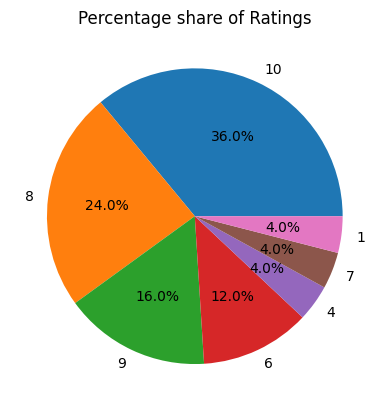

In [8]:
plt.pie(review_data.Ratings.value_counts(),labels=[10,8,9,6,4,7,1],autopct='%1.1f%%')
plt.title('Percentage share of Ratings')
plt.show()

Most of the viewers of the movie 'Kalki 2898AD ' have reviewed as a good flim with the percentage of 36% 

Based the value counts of the ratings, we can assume that the Positive ratings would be around ratings of 8,9,10
, the Neutral ratings of 7,6 stars and the negative ratings of 1,4 stars.

#Replacing the values of 10,9,8 as positive comments or 1 ,
#values of 6,7 as neutral comments or 0,
#values of 1,4 as negative comments or -1

In [9]:
review_data['Ratings']=review_data['Ratings'].replace({10:1,9:1,8:1,7:0,6:0,4:-1,1:-1})

In [10]:
review_data.sample(10)

,Comments,Ratings
1720,It seems like the writer cum director only abl...,-1
2062,Kalki28989AD amply suffices my expectations in...,1
2913,A unique story and mixup of technology and Mah...,1
4108,"Let me share a review of the movie ""Kalki 2898...",1
3229,Best Indian movie Nagi combined Hindu mytholog...,1
3385,Where to even begin to define this Subpar movi...,-1
4812,Kalki28989AD amply suffices my expectations in...,1
1807,The soaring epicness of second part of the fil...,0
1782,The soaring epicness of second part of the fil...,0
847,This film is absolutely good....everything...T...,1


In [11]:
review_data['Ratings'].value_counts()

Ratings
 1    3800
 0     800
-1     400
Name: count, dtype: int64

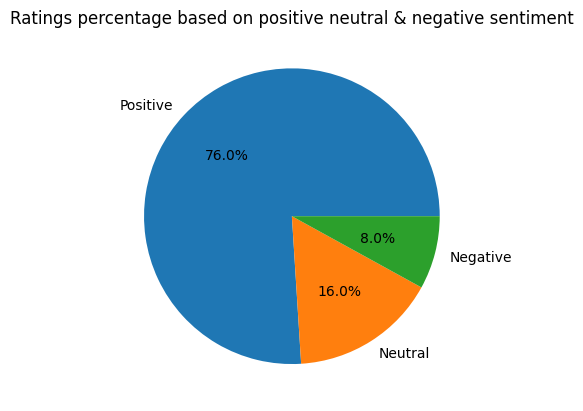

In [12]:
plt.pie(review_data.Ratings.value_counts(),labels=['Positive','Neutral','Negative'],autopct='%1.1f%%')
plt.title('Ratings percentage based on positive neutral & negative sentiment')
plt.show()

<Axes: xlabel='Ratings', ylabel='count'>

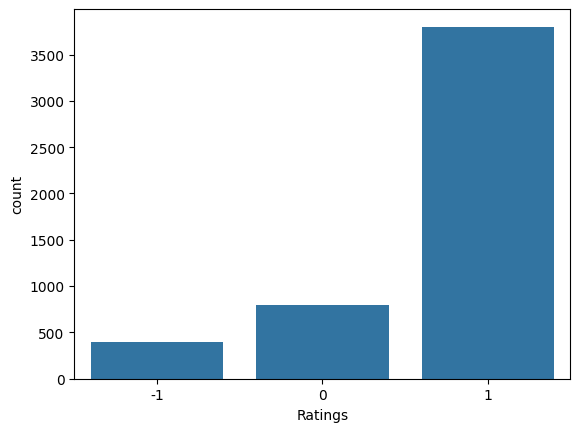

In [13]:
sns.countplot(x=review_data.Ratings, data=review_data)

### **Text preprocessing using nltk libraries**

#importing the necessary libraries

In [14]:
import nltk,re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [15]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
pattern=re.compile(r"[^A-Za-z0-9\s]")
stop_words =stopwords.words('english')
lm=WordNetLemmatizer()

In [18]:
def preprocessed_text(text):
  unwanted_words={'kalki','2898','ad','movie','kalki2898ad','flim'}
  clean_comments = re.sub(pattern,' ',text)
  clean_comments = clean_comments.lower()

  clean_comments = clean_comments.split()

  clean_comments = [lm.lemmatize(word) for word in clean_comments if not word in stop_words and unwanted_words]
  clean_comments = ' '.join(clean_comments)


  return clean_comments

In [19]:
review_data['clean_comments'] = review_data['Comments'].apply(preprocessed_text)

In [20]:
review_data.sample(10)

,Comments,Ratings,clean_comments
2616,"Prabhas' latest film, ""Kalki,"" is nothing shor...",1,prabhas latest film kalki nothing short cinema...
883,"Let me share a review of the movie ""Kalki 2898...",1,let share review movie kalki 2898 ad directed ...
2240,This movie is a spectacular achievement for In...,1,movie spectacular achievement indian cinema re...
1815,This movie is a spectacular achievement for In...,1,movie spectacular achievement indian cinema re...
3352,"Majestic at scale, grandeur in VFX, and great ...",1,majestic scale grandeur vfx great blend sci fi...
765,This movie is a spectacular achievement for In...,1,movie spectacular achievement indian cinema re...
3895,It seems like the writer cum director only abl...,-1,seems like writer cum director able imagine ka...
2982,The soaring epicness of second part of the fil...,0,soaring epicness second part film excellent cl...
1059,I don't understand the obsession with hero ent...,0,understand obsession hero entry people good st...
3586,Definitely worth watching in the theatre\nGrea...,1,definitely worth watching theatre great visual...


In [21]:
#Selecting the feature and target values as x and y
x=review_data['clean_comments']
y=review_data['Ratings']

In [22]:
from sklearn.model_selection import train_test_split
train_comments,test_comments,train_ratings,test_ratings=train_test_split(x,y,test_size=0.3, stratify=y, random_state=2)
train_comments.shape

(3500,)

Modelling using Bag of words technique

In [23]:
bog=CountVectorizer()
train_comments_bog=bog.fit_transform(train_comments)
test_comments_bog=bog.transform(test_comments)

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100)

In [25]:
model.fit(train_comments_bog,train_ratings)

LogisticRegression()

In [26]:
bog_train_predictions=model.predict(train_comments_bog)
bog_test_predictions=model.predict(test_comments_bog)
print(bog_train_predictions)
print(bog_test_predictions)

[ 1  1  1 ... -1  1  1]
[1 0 1 ... 1 1 1]


In [27]:
from sklearn import metrics

In [28]:
bog_classification_report1=metrics.classification_report(bog_train_predictions,train_ratings)
print(bog_classification_report1)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       280
           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00      2660

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [29]:
bog_classification_report2=metrics.classification_report(bog_test_predictions,test_ratings)
print(bog_classification_report2)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       120
           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [30]:
bog_confusion_matrix=metrics.confusion_matrix(bog_test_predictions,test_ratings)
bog_confusion_matrix

array([[ 120,    0,    0],
       [   0,  240,    0],
       [   0,    0, 1140]], dtype=int64)

Modelling using TF-IDF technique

In [31]:
tf=TfidfVectorizer()
train_comments_tf=tf.fit_transform(train_comments)
test_comments_tf=tf.transform(test_comments)

In [32]:
model.fit(train_comments_tf,train_ratings)

LogisticRegression()

In [33]:
tf_train_predictions=model.predict(train_comments_tf)
tf_test_predictions=model.predict(test_comments_tf)
print(tf_train_predictions)
print(tf_test_predictions)

[ 1  1  1 ... -1  1  1]
[1 0 1 ... 1 1 1]


In [34]:
tf_classification_report1=metrics.classification_report(tf_train_predictions,train_ratings)
print(tf_classification_report1)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       280
           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00      2660

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [35]:
tf_classification_report2=metrics.classification_report(tf_test_predictions,test_ratings)
print(tf_classification_report2)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       120
           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [36]:
tfidf_confusion_matrix=metrics.confusion_matrix(tf_test_predictions,test_ratings)
tfidf_confusion_matrix

array([[ 120,    0,    0],
       [   0,  240,    0],
       [   0,    0, 1140]], dtype=int64)

The model has generated a accuracy of 100% with the given training and test dataset. :)

### **Text Visualisation**

In [37]:
#Splitting the data based on the sentiments
positive_data=review_data[review_data['Ratings']==1]
neutral_data=review_data[review_data['Ratings']==0]
negative_data=review_data[review_data['Ratings']==-1]

In [38]:
from wordcloud import WordCloud

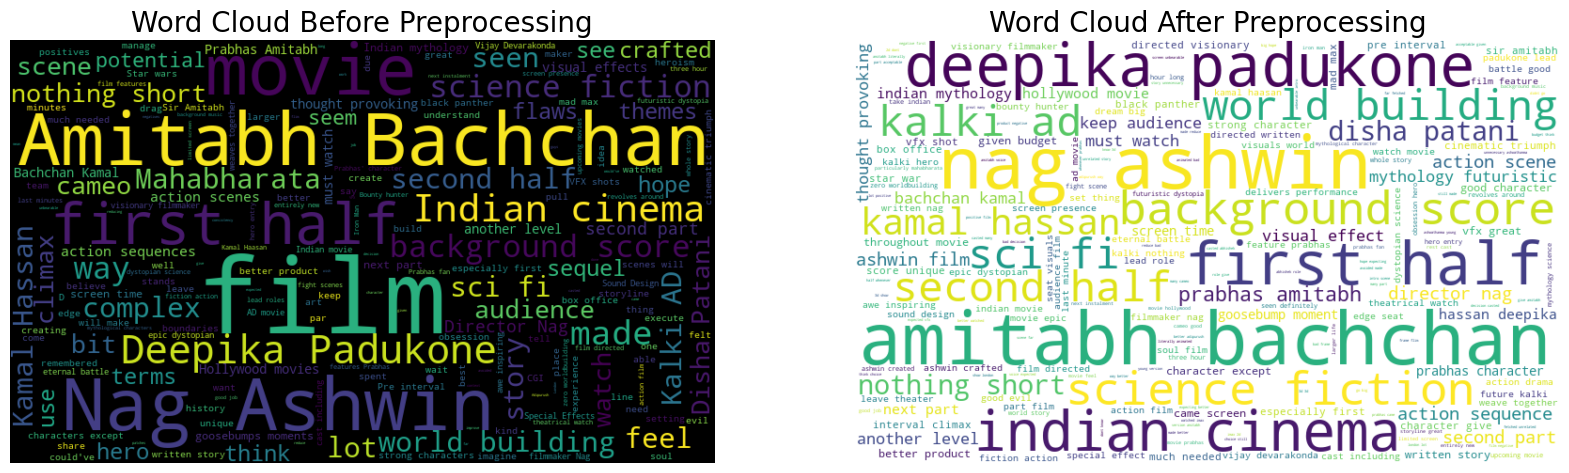

In [39]:
all_words_raw = " ".join([sentence for sentence in review_data['Comments']])
all_words_processed = " ".join([sentence for sentence in review_data['clean_comments']])

#Declaring the wordcloud
rawcloud=WordCloud(width=750, height=450, random_state=21, max_font_size=110)
procloud=WordCloud(width=750, height=450, random_state=21,background_color='White', max_font_size=110)

#fitting teh wordcloud
wordcloud_raw = rawcloud.generate(all_words_raw)
wordcloud_processed = procloud.generate(all_words_processed)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#For displaying the wordcloud
axes[0].imshow(wordcloud_raw, interpolation='bilinear')
axes[0].set_title('Word Cloud Before Preprocessing', fontsize=20)
axes[0].axis('off')

axes[1].imshow(wordcloud_processed, interpolation='bilinear')
axes[1].set_title('Word Cloud After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

### **wordcloud for positive comments**

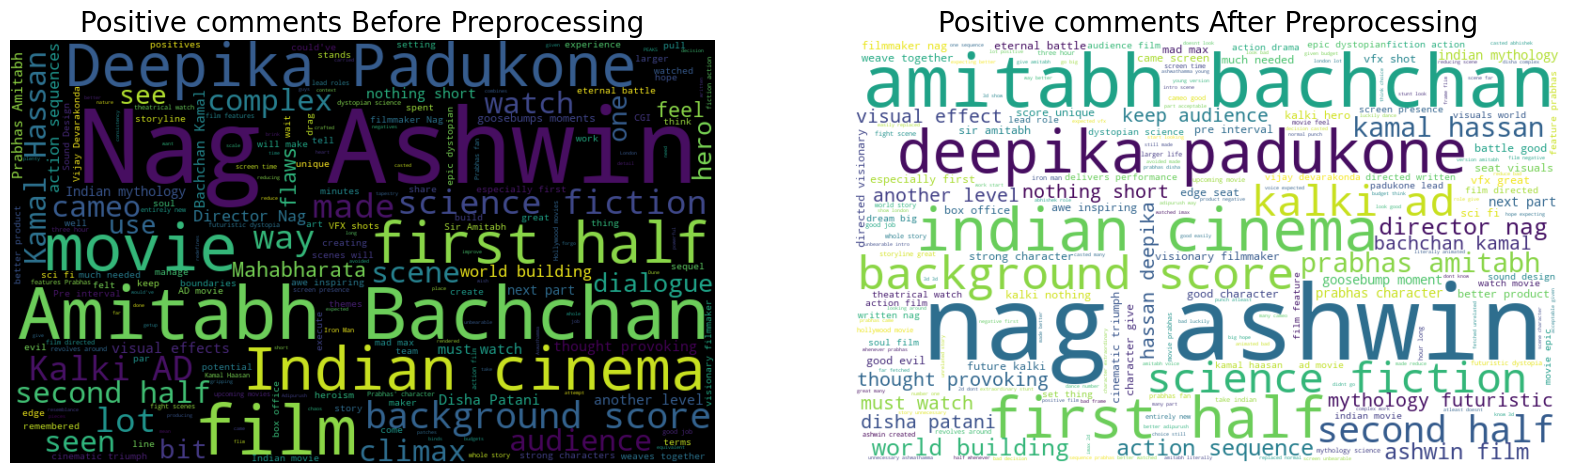

In [40]:
all_words_raw_positive = " ".join([sentence for sentence in positive_data['Comments']])
all_words_processed_positive = " ".join([sentence for sentence in positive_data['clean_comments']])

positive_wordcloud_raw=rawcloud.generate(all_words_raw_positive)
positive_wordcloud_pro=procloud.generate(all_words_processed_positive)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#For displaying the wordcloud
axes[0].imshow(positive_wordcloud_raw, interpolation='bilinear')
axes[0].set_title('Positive comments Before Preprocessing', fontsize=20)
axes[0].axis('off')

axes[1].imshow(positive_wordcloud_pro, interpolation='bilinear')
axes[1].set_title('Positive comments After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

### **wordcloud for neutral comments**

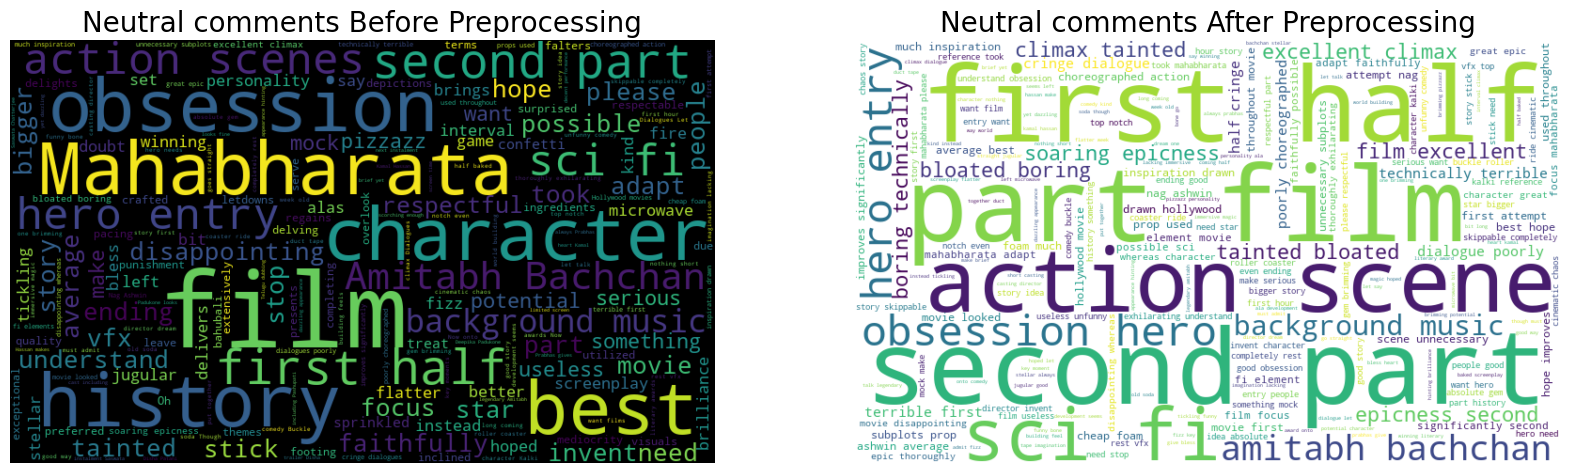

In [41]:
all_words_raw_neutral = " ".join([sentence for sentence in neutral_data['Comments']])
all_words_processed_neutral = " ".join([sentence for sentence in neutral_data['clean_comments']])

neutral_wordcloud_raw=rawcloud.generate(all_words_raw_neutral)
neutral_wordcloud_pro=procloud.generate(all_words_processed_neutral)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#For displaying the wordcloud
axes[0].imshow(neutral_wordcloud_raw, interpolation='bilinear')
axes[0].set_title('Neutral comments Before Preprocessing', fontsize=20)
axes[0].axis('off')

axes[1].imshow(neutral_wordcloud_pro, interpolation='bilinear')
axes[1].set_title('Neutral comments After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

### **wordcloud for negative comments**

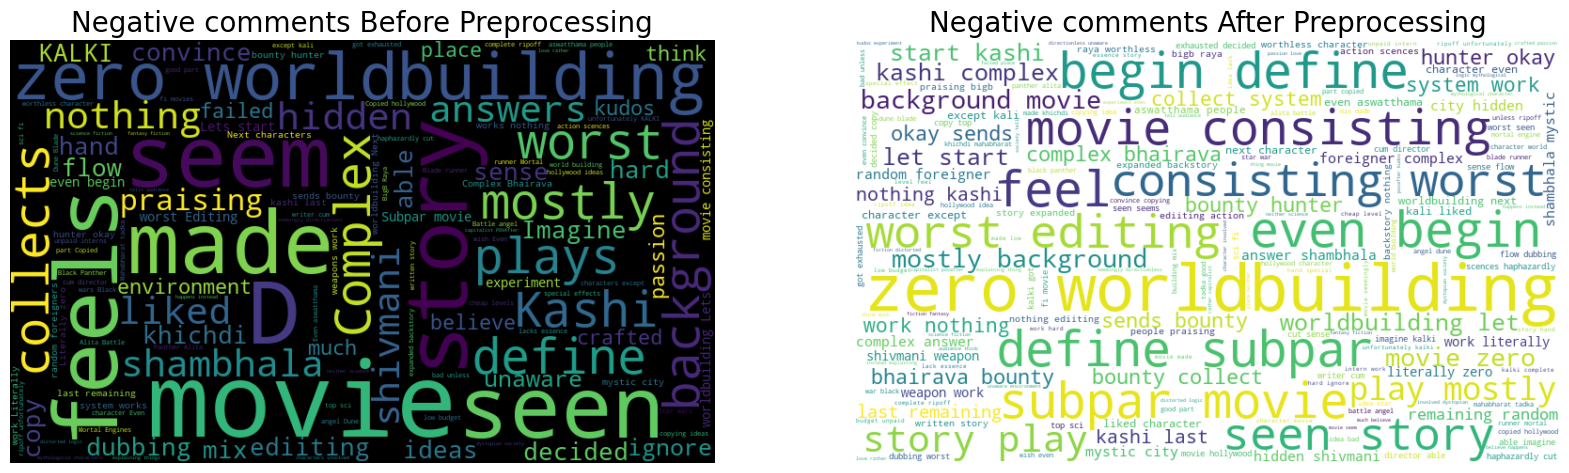

In [42]:
all_words_raw_negative = " ".join([sentence for sentence in negative_data['Comments']])
all_words_processed_negative = " ".join([sentence for sentence in negative_data['clean_comments']])

negative_wordcloud_raw=rawcloud.generate(all_words_raw_negative)
negative_wordcloud_pro=procloud.generate(all_words_processed_negative)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#For displaying the wordcloud
axes[0].imshow(negative_wordcloud_raw, interpolation='bilinear')
axes[0].set_title('Negative comments Before Preprocessing', fontsize=20)
axes[0].axis('off')

axes[1].imshow(negative_wordcloud_pro, interpolation='bilinear')
axes[1].set_title('Negative comments After Preprocessing', fontsize=20)
axes[1].axis('off')

plt.show()

### **Conclusion**

The above word cloud images represents the word frequency of the respective positive, neutral and negative comments of the reviewers in IMDb platform. Overall, the film is amazing to enjoy and entertain the audience. 

Based the comments of the reviewers, the screen presence and performance of various actors in the film is praised a lot. Director and their team of 'Kalki 2898 AD' especially technical team has done a wonderful job. Has a good move in first half and many faced a editing lag and mentioned fight scenes also.

The analysis represents the sentimenatal analysis using logistic regression with accuracy of 100%.